# 0 Mise en place des fonctions de travail 

In [80]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [81]:
import random

def generate_random_array(debug=False, N=21):
    """Renvoie un tableau contenant toutes les valeurs entières de 0 (inclus)
    à N (exclus) rangées dans un ordre aléatoire

    Args:
        debug (boolean): quand debug est vrai, la fonction renvoie toujours le
                         même tableau afin de simplifier le débogage de vos
                         algorithmes de tri
        N (int): la taille du tableau à renvoyer

    Returns:
        list[int]: un tableau d'entiers, de taille N, non ordonné
    """

    if debug:
        return [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]

    array = list(range(0, N))
    random.shuffle(array)

    return array

In [82]:
# Exemple d'utilisation de la fonction precedente

print(generate_random_array()) # Retourne un tableau avec des nombres naturels allant de 0 a 20
print(generate_random_array(True)) # Retourne le tableau [3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
print(generate_random_array(N=31)) # Des nombres naturels allant de 0 a 30

[7, 6, 10, 9, 18, 16, 5, 4, 8, 20, 0, 15, 12, 19, 14, 3, 11, 2, 1, 17, 13]
[3, 9, 7, 1, 6, 2, 8, 4, 5, 0]
[27, 30, 1, 29, 8, 9, 13, 4, 11, 28, 0, 6, 2, 5, 12, 24, 23, 20, 14, 16, 15, 17, 25, 7, 21, 22, 18, 10, 26, 3, 19]


In [83]:
def swap(tab, i, j):
    
    """Échange la place des éléments aux indices i et j du tableau"""
    tab[i],tab[j]=tab[j],tab[i]
    

# 1 Les tris classiques 

## 1.1 Tri à bulles

**Un pseudocode possible** *(source : Wikipedia)*

```
procedure tri_à_bulles(Tableau T)
   pour i allant de (taille de T)-1 à 1
       pour j allant de 0 à i-1
           si T[j+1] < T[j] alors
               échanger(T[j+1], T[j])
       fin pour
   fin pour
        
```

In [84]:
def bubble(A):
    """Trie le tableau en déplaçant les plus grosses valeurs vers la fin du
    tableau, un peu comme des bulles dans l'eau qui remonteraient à la
    surface"""

def bubble_sort(arr):
    n = len(arr)
    # Traverse through all elements in the array
    for i in range(n):
        # Last i elements are already in place, so we don't need to check them
        for j in range(0, n - i - 1):
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]


In [85]:
arr = generate_random_array(N=1000)
%lprun -f bubble_sort bubble_sort(arr)

In [86]:
N = [10, 50, 75, 100, 500, 750, 1000]
bubble_results = [55, 1275, 2850, 5050, 125250, 281625, 500500]
insertion_results = [24,717,1577, 2569, 63777, 139963, 243989]
selection_results = [54, 1274, 2849, 5049, 125249, 281624, 500499]

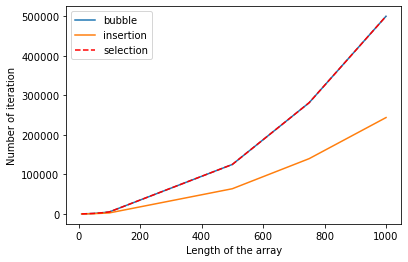

In [95]:
import matplotlib.pyplot as plt

plt.plot(N, bubble_results, label='bubble')
plt.plot(N, insertion_results, label='insertion')
plt.plot(N, selection_results, label='selection', linestyle='--', color='red')
plt.xlabel('Length of the array')
plt.ylabel('Number of iteration')
plt.legend()
plt.show()

In [88]:
random_array_msr =  generate_random_array()
print(random_array_msr)

bubble(random_array_msr)

print('after', random_array_msr)

bubble(generate_random_array())

[15, 16, 7, 18, 9, 17, 11, 6, 2, 14, 12, 1, 8, 13, 5, 4, 20, 3, 10, 19, 0]
after [15, 16, 7, 18, 9, 17, 11, 6, 2, 14, 12, 1, 8, 13, 5, 4, 20, 3, 10, 19, 0]


## 1.2 Insertion

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_insertion(tableau T, entier n)

  pour i de 1 à n - 1
        # mémoriser T[i] dans x
        x ← T[i]                            

        j ← i                               
        tant que j > 0 et T[j - 1] > x
                 T[j] ← T[j - 1]
                 j ← j - 1

        # placer x dans le "trou" laissé par le décalage
        T[j] ← x 
```

In [89]:
#def insertion(A):
    """Trie le tableau en plaçant l'élément courant à la bonne place dans
    le sous-tableau déjà trié"""

def insertion_sort(arr):
    n = len(arr)
    # Traverse through all elements in the array
    for i in range(1, n):
        key = arr[i]  # Current element to be compared
        j = i - 1  # Index of the previous element
        
        # Compare the current element with elements before it
        # and move them one position ahead if they are greater than the key
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        
        # Place the key in its correct position in the sorted part of the array
        arr[j + 1] = key


IndentationError: unexpected indent (981941357.py, line 2)

In [ ]:
random_array_msr =  generate_random_array()
print(random_array_msr)

insertion(random_array_msr)

print('after', random_array_msr)

insertion(generate_random_array())

In [ ]:
arr = generate_random_array(N=1000)
%lprun -f insertion_sort insertion_sort(arr)

## 1.3 Selection

**Un pseudocode possible** *(source : Wikipedia)*

```
procédure tri_selection(tableau t, entier n)
  pour i de 0 à n - 2
      min ← i       
      pour j de i + 1 à n - 1
          si t[j] < t[min], alors min ← j
      fin pour
      si min ≠ i, alors échanger t[i] et t[min]
  fin pour
fin procédure
```

In [90]:
def selection_sort(arr):
    n = len(arr)
    # Traverse through all elements in the array
    for i in range(n - 1):
        # Assume the current index is the minimum
        min_index = i
        # Find the minimum element in the remaining unsorted portion of the array
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        # Swap the found minimum element with the first element of the unsorted portion
        arr[i], arr[min_index] = arr[min_index], arr[i]

In [91]:
random_array_msr =  generate_random_array()
print(random_array_msr)

selection(random_array_msr)

print('after', random_array_msr)

selection(generate_random_array())

[20, 2, 17, 19, 12, 13, 1, 6, 5, 8, 9, 11, 0, 16, 18, 15, 7, 4, 14, 10, 3]
after [20, 2, 17, 19, 12, 13, 1, 6, 5, 8, 9, 11, 0, 16, 18, 15, 7, 4, 14, 10, 3]


In [92]:
arr = generate_random_array(N=1000)
%lprun -f selection_sort selection_sort(arr)